In [1]:
### GSEA enrichment analysis

library(clusterProfiler)
library(tidyverse)
library(dplyr)
library(msigdbr)
library(enrichplot)
library(DOSE)
library(ggplot2)
library("ggridges")
# GSEA_r <- snakemake@output[["GSEA_r"]]
# GSEA_ridgeplot <- snakemake@output[["GSEA_ridgeplot"]]
# type <- snakemake@wildcards[["msign"]]
# signature<-snakemake@wildcards[['cluster']]
type='C8'




Registered S3 method overwritten by 'ggtree':
  method      from 
  identify.gg ggfun

clusterProfiler v4.2.2  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProfiler in published research, please cite:
T Wu, E Hu, S Xu, M Chen, P Guo, Z Dai, T Feng, L Zhou, W Tang, L Zhan, X Fu, S Liu, X Bo, and G Yu. clusterProfiler 4.0: A universal enrichment tool for interpreting omics data. The Innovation. 2021, 2(3):100141


Attaching package: ‘clusterProfiler’


The following object is masked from ‘package:stats’:

    filter


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()   masks clusterProfiler::filter(), stats::filter()
✖ dplyr::lag()      ma

[1] "sto facendo"


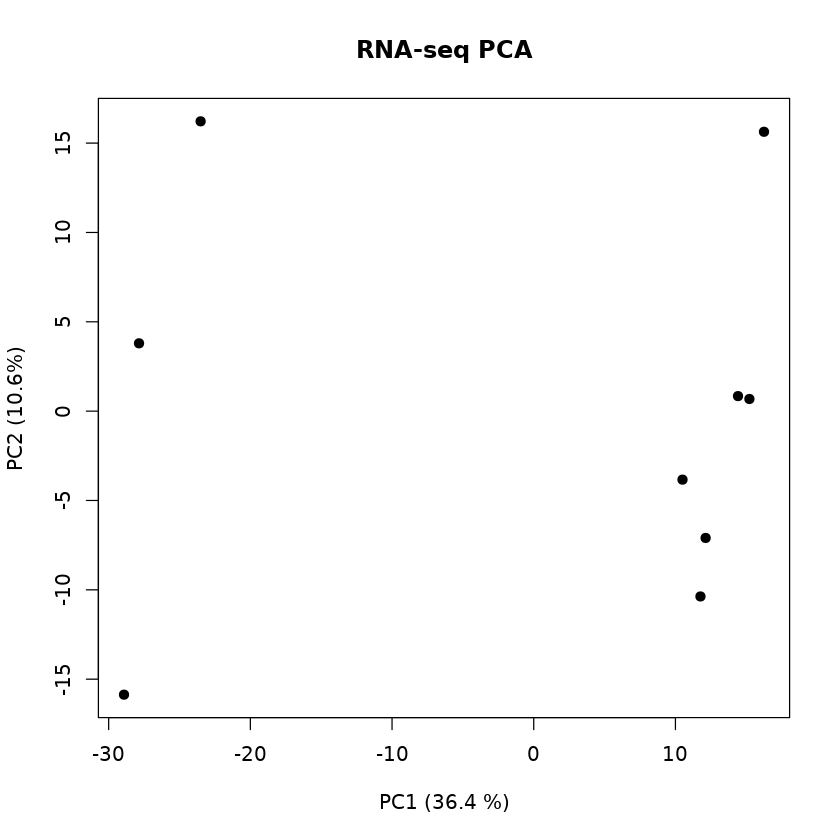

In [22]:
print("sto facendo")
waffle="/sharedFolder/Data/2_RNA_seq/_log2TPM.txt"
gene_res_df <- read.table(waffle, sep = "\t",header = TRUE,row.names=1 )
principal.components=c(1,2)
#gene_res_df <- log2(gene_res_df+1)
pca <- prcomp(t(gene_res_df))
variance.proportion <- summary(pca)$importance[2,]
plot(pca$x[,c(1,2)], main="RNA-seq PCA", pch=19, xlab=paste(dimnames(pca$x)[[2]][principal.components[1]],' (',
        signif(variance.proportion[principal.components[1]]*100,3),' %',')', sep=""), ylab=paste(dimnames(pca$x)[[2]][principal.components[2]],' (',
        signif(variance.proportion[principal.components[2]]*100,3),'%',')', sep=""))

In [6]:
colnames(gene_res_df)

[1] "DMSO_1_Cov.1" "DMSO_2_Cov.1" "DMSO_3_Cov.1" "TAZ_1_Cov.2"  "TAZ_2_Cov.2" 
[6] "TAZ_3_Cov.2"  "Vale_1_Cov.3" "Vale_2_Cov.3" "Vale_3_Cov.3"

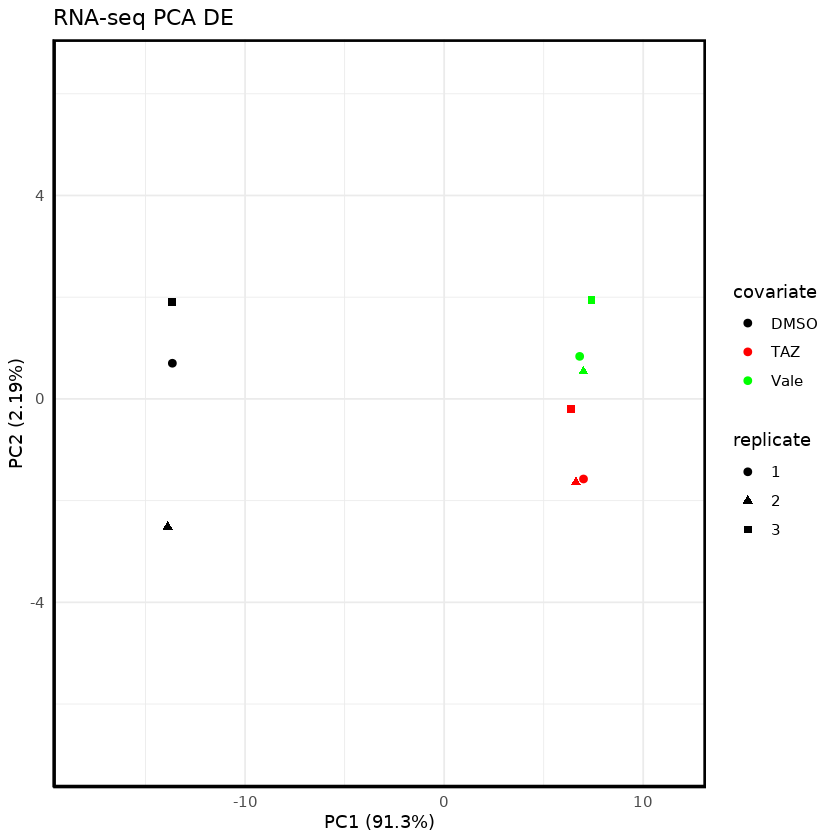

In [7]:
library(ggplot2)
waffle="/sharedFolder/Data/2_RNA_seq/_log2FPKM.txt"
DEgenesTaze="/sharedFolder/Data/2_RNA_seq/TazeVSDMSO/DEfiltered_log2fc_1_fdr_0.1.txt"
DEgenesVale="/sharedFolder/Data/2_RNA_seq/ValeVSDMSO/DEfiltered_log2fc_1_fdr_0.1.txt"
DETaze=read.table(DEgenesTaze,header=TRUE,row.names=1,sep="\t")
DEVale=read.table(DEgenesVale,header=TRUE,row.names=1,sep="\t")
gene_res_df <- read.table(waffle, sep = "\t",header = TRUE,row.names=1 )
gene_res_df=gene_res_df[unique(union(rownames(DETaze),rownames(DEVale))),]
principal.components=c(1,2)
#gene_res_df <- log2(gene_res_df+1)
pca <- prcomp(t(gene_res_df))
variance.proportion <- summary(pca)$importance[2,]
# Assuming gene_res_df is already loaded and pca is computed
variance.proportion <- summary(pca)$importance[2,]
pca_data <- as.data.frame(pca$x[,c(1,2)])
names(pca_data) <- c('PC1', 'PC2')

# Estraiamo covariate e replicati dai nomi delle colonne
covariate <- sub("_.*", "", colnames(gene_res_df))
replicate <- gsub(".*_(\\d+)_.*", "\\1", colnames(gene_res_df))

# Aggiungiamo i dati di covariate e replicati al frame dei dati PCA
pca_data$covariate <- factor(covariate)
pca_data$replicate <- factor(replicate)

# Determina i limiti per lo zoom out
xrange <- range(pca_data$PC1, na.rm = TRUE)
yrange <- range(pca_data$PC2, na.rm = TRUE)
xextend <- (xrange[2] - xrange[1]) * 0.2
yextend <- (yrange[2] - yrange[1]) * 1
xlims <- c(xrange[1] - xextend, xrange[2] + xextend)
ylims <- c(yrange[1] - yextend, yrange[2] + yextend)

# Creazione del plot con ggplot
p <- ggplot(pca_data, aes(x = PC1, y = PC2, color = covariate, shape = replicate)) +
  geom_point(size=1.8) +
  scale_shape_manual(values=c(19, 17, 15)) + # Personalizza le forme se necessario
  scale_color_manual(values=c("black", "red", "green")) + # Personalizza i colori se necessario
  labs(title = "RNA-seq PCA DE", 
       x = paste('PC1 (', signif(variance.proportion[1]*100,3),'%)', sep=""), 
       y = paste('PC2 (', signif(variance.proportion[2]*100,3),'%)', sep="")) +
  xlim(xlims) +
  ylim(ylims) +
  theme_minimal() +
  theme(
  panel.border = element_rect(colour = "black", fill=NA, size=1.5), # Aggiunge un bordo nero al pannello del plot
  axis.line = element_line(colour = "black")  # Aggiunge una linea nera ai bordi degli assi
)
print(p)


[1] "Vpreb3:ENSMUSG00000000903"        "Col6a1:ENSMUSG00000001119"       
  [3] "Col18a1:ENSMUSG00000001435"       "Csn3:ENSMUSG00000001622"         
  [5] "Prkra:ENSMUSG00000002731"         "Nab1:ENSMUSG00000002881"         
  [7] "Spic:ENSMUSG00000004359"          "Arhgef40:ENSMUSG00000004562"     
  [9] "Hdac9:ENSMUSG00000004698"         "Adgre1:ENSMUSG00000004730"       
 [11] "Chd5:ENSMUSG00000005045"          "Ndrg1:ENSMUSG00000005125"        
 [13] "Slc1a3:ENSMUSG00000005360"        "Fcer2a:ENSMUSG00000005540"       
 [15] "Kif1a:ENSMUSG00000014602"         "Stc1:ENSMUSG00000014813"         
 [17] "Abca1:ENSMUSG00000015243"         "C1qtnf1:ENSMUSG00000017446"      
 [19] "Timp2:ENSMUSG00000017466"         "Slc2a4:ENSMUSG00000018566"       
 [21] "Abca5:ENSMUSG00000018800"         "Pkib:ENSMUSG00000019876"         
 [23] "Hsf2:ENSMUSG00000019878"          "Sgk1:ENSMUSG00000019970"         
 [25] "Igf1:ENSMUSG00000020053"          "Pdlim4:ENSMUSG00000020388"       
 [27] "Tcn2:ENSMUSG00000020432"          "Galnt10:ENSMUSG00000020520"      
 [29] "Rgs9:ENSMUSG00000020599"          "Efcab3:ENSMUSG00000020690"       
 [31] "Ror2:ENSMUSG00000021464"          "Mctp1:ENSMUSG00000021596"        
 [33] "Dnah12:ENSMUSG00000021879"        "Arhgef3:ENSMUSG00000021895"      
 [35] "Epsti1:ENSMUSG00000022014"        "Olfm4:ENSMUSG00000022026"        
 [37] "Ephx2:ENSMUSG00000022040"         "Amacr:ENSMUSG00000022244"        
 [39] "Rai14:ENSMUSG00000022246"         "Klhl38:ENSMUSG00000022357"       
 [41] "Vdr:ENSMUSG00000022479"           "Il1rap:ENSMUSG00000022514"       
 [43] "B3gnt5:ENSMUSG00000022686"        "Arhgap31:ENSMUSG00000022799"     
 [45] "Itgb5:ENSMUSG00000022817"         "Pros1:ENSMUSG00000022912"        
 [47] "Rps6ka2:ENSMUSG00000023809"       "Svil:ENSMUSG00000024236"         
 [49] "Snx24:ENSMUSG00000024535"         "Cemip2:ENSMUSG00000024754"       
 [51] "Pcgf5:ENSMUSG00000024805"         "Apba1:ENSMUSG00000024897"        
 [53] "Rbp4:ENSMUSG00000024990"          "Casp7:ENSMUSG00000025076"        
 [55] "Cd7:ENSMUSG00000025163"           "Loxl4:ENSMUSG00000025185"        
 [57] "Maged2:ENSMUSG00000025268"        "Paqr8:ENSMUSG00000025931"        
 [59] "Tmem14a:ENSMUSG00000025933"       "Klf7:ENSMUSG00000025959"         
 [61] "Il1r2:ENSMUSG00000026073"         "Inpp1:ENSMUSG00000026102"        
 [63] "Nabp1:ENSMUSG00000026107"         "Tnnt2:ENSMUSG00000026414"        
 [65] "Tnni1:ENSMUSG00000026418"         "Dusp23:ENSMUSG00000026544"       
 [67] "Cr2:ENSMUSG00000026616"           "Tnfsf4:ENSMUSG00000026700"       
 [69] "Vim:ENSMUSG00000026728"           "Ermn:ENSMUSG00000026830"         
 [71] "Gsn:ENSMUSG00000026879"           "Nmi:ENSMUSG00000026946"          
 [73] "Prnd:ENSMUSG00000027338"          "Tpd52:ENSMUSG00000027506"        
 [75] "Fabp5:ENSMUSG00000027533"         "Car13:ENSMUSG00000027555"        
 [77] "Ppm1l:ENSMUSG00000027784"         "Pfn2:ENSMUSG00000027805"         
 [79] "Serpini1:ENSMUSG00000027834"      "Vcam1:ENSMUSG00000027962"        
 [81] "Lmna:ENSMUSG00000028063"          "Acp6:ENSMUSG00000028093"         
 [83] "Bdh2:ENSMUSG00000028167"          "Gbp3:ENSMUSG00000028268"         
 [85] "Gbp2:ENSMUSG00000028270"          "Gabrr1:ENSMUSG00000028280"       
 [87] "Tnfsf8:ENSMUSG00000028362"        "Tnfrsf9:ENSMUSG00000028965"      
 [89] "Dpysl5:ENSMUSG00000029168"        "Shroom3:ENSMUSG00000029381"      
 [91] "Oasl2:ENSMUSG00000029561"         "Abcg2:ENSMUSG00000029802"        
 [93] "Lrig1:ENSMUSG00000030029"         "Frmd4b:ENSMUSG00000030064"       
 [95] "Erc1:ENSMUSG00000030172"          "Plekha5:ENSMUSG00000030231"      
 [97] "Tspan9:ENSMUSG00000030352"        "Csrp3:ENSMUSG00000030470"        
 [99] "Rgs10:ENSMUSG00000030844"         "Cdkl5:ENSMUSG00000031292"        
[101] "Ido2:ENSMUSG00000031549"          "Ido1:ENSMUSG00000031551"         
[103] "Bmper:ENSMUSG00000031963"         "Mpzl2:ENSMUSG00000032092"        
[105] "Ddx25:ENSMUSG00000032101"         "Olfm2:EN